# Molecular Dynamics with Allegro

### Authors: Simon Batzner and Albert Musaelian, Anders Johansson, Lixin Sun, Boris Kozinsky

<center>
<img src="https://github.com/mir-group/allegro/blob/main/logo.png?raw=true" width="30%">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://github.com/mir-group/nequip/blob/main/logo.png?raw=true" width="30%">
<center/>

## What is this?

This is a tutorial for Allegro, an architecture for building highly accurate and scalable Machine Learning Interatomic Potentials (MLIPs). The ideas are described [in this paper](https://arxiv.org/abs/2204.05249). We have released an [open-source package](https://github.com/mir-group/allegro) implementing Allegro, which builds on the `nequip` framework with the goal of making it straightforward to train your own Allegro models with a few simple commands.
This tutorial serves as a simple introduction into the Allegro package and `nequip` code.


## What can it do?

The goal of Allegro is to make it as simple as possible to train an acurate, fast, and scalable Machine Learning Interatomic Potential and deploy it in production simulations. You will never have to write a single line of Python, but instead you can train a network with a single command and easily use it to run MD in LAMMPS or ASE. If you need to customize it to your needs, the code is also modular and flexible under the hood.

## Contents

This tutorial will teach you how to:

* Train a model
* Deploy the model intro production
* Run MD with it in LAMMPS
* (Optional) Extend the model with custom code

Everything will happen in this Colab, including running LAMMPS. Training + inference will take only about 10 minutes. Before you get started, however, you will have to compile LAMMPS which takes **approximately 8 minutes**. Once we have installed NequIP, Allegro, and LAMMPS, we're ready to get started.


**❗❗❗ Confirm device is GPU ❗❗❗**

Before you get started, make sure that in your menu bar Runtime → Change runtime type is set to GPU

## Resources

Allegro builds on the NequIP code which you find [here](https://github.com/mir-group/nequip).


Papers:

[1] NequIP: https://www.nature.com/articles/s41467-022-29939-5

[2] Allegro: https://arxiv.org/abs/2204.05249


Code:

[1] NequIP: https://github.com/mir-group/nequip

[2] Allegro: https://github.com/mir-group/allegro

## Install

This will take approximately 5 minutes since we will be building LAMMPS.

In [1]:
# install wandb
!pip install wandb

# install nequip
!pip install nequip==0.5.5 torch==1.11

# fix colab imports
import site
site.main()

# set to allow anonymous WandB
import os
os.environ["WANDB_ANONYMOUS"] = "must"

# install allegro
!git clone --depth 1 https://github.com/mir-group/allegro.git
!pip install allegro/

# clone lammps
!git clone --depth=1 https://github.com/lammps/lammps

# clone pair_allegro and pair_nequip
!git clone --depth 1 https://github.com/mir-group/pair_allegro.git

# download libtorch
!wget https://download.pytorch.org/libtorch/cu102/libtorch-cxx11-abi-shared-with-deps-1.11.0%2Bcu102.zip && unzip -q libtorch-cxx11-abi-shared-with-deps-1.11.0+cu102.zip

# patch lammps
!cd pair_allegro && bash patch_lammps.sh ../lammps/

# install mkl interface
!pip install mkl-include

# update cmake
!wget https://github.com/Kitware/CMake/releases/download/v3.23.1/cmake-3.23.1-linux-x86_64.sh
!sh ./cmake-3.23.1-linux-x86_64.sh --prefix=/usr/local --exclude-subdir

# build lammps
!cd lammps && rm -rf build && mkdir build  && cd build && cmake ../cmake -DCMAKE_BUILD_TYPE=Release -DCMAKE_PREFIX_PATH=/content/libtorch -DMKL_INCLUDE_DIR=`python -c "import sysconfig;from pathlib import Path;print(Path(sysconfig.get_paths()[\"include\"]).parent)"` && make -j$(nproc)


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached nequip-0.5.5-py3-none-any.whl.metadata (814 bytes)
Using cached nequip-0.5.5-py3-none-any.whl (138 kB)
  Attempting uninstall: nequip
    Found existing installation: nequip 0.6.1
    Uninstalling nequip-0.6.1:
      Successfully uninstalled nequip-0.6.1



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
fatal: destination path 'allegro' already exists and is not an empty directory.


Processing c:\users\dinle\code\competition\dacon\samsung\machine learning force fields\allegro
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mir-allegro: filename=mir_allegro-0.2.0-py3-none-any.whl size=27695 sha256=9e749164ad0e683c0a6437716be97ee21f6f1ef10cbc92d020f1f7e8c1fbe0d8
  Stored in directory: C:\Users\dinle\AppData\Local\Temp\pip-ephem-wheel-cache-xuzqit8r\wheels\14\d4\3c\fc1db279479e38fcdae0de0b1cd69dd4e8594471e5f5779cca
Successfully built mir-allegro
  Attempting uninstall: mir-allegro
    Found existing installation: mir-allegro 0.2.0
    Uninstalling mir-allegro-0.2.0:
      Successfully uninstalled mir-allegro-0.2.0



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
fatal: destination path 'lammps' already exists and is not an empty directory.
fatal: destination path 'pair_allegro' already exists and is not an empty directory.
'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
patch_lammps.sh: line 3: $'\r': command not found
patch_lammps.sh: line 5: $'\r': command not found
patch_lammps.sh: line 7: syntax error near unexpected token `$'in\r''
patch_lammps.sh: line 7: `   case $option in
'



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sh'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
# Python imports and pre-definitions
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.size'] = 30

def parse_lammps_rdf(rdffile):
    """Parse the RDF file written by LAMMPS
    copied from Boris' class code: https://github.com/bkoz37/labutil
    """
    with open(rdffile, 'r') as rdfout:
        rdfs = []; buffer = []
        for line in rdfout:
            values = line.split()
            if line.startswith('#'):
                continue
            elif len(values) == 2:
                nbins = values[1]
            else:
                buffer.append([float(values[1]), float(values[2])])
                if len(buffer) == int(nbins):
                    frame = np.transpose(np.array(buffer))
                    rdfs.append(frame)
                    buffer = []
    return rdfs

## Workflow

Our workflow consists of 3 steps: train, deploy, and run:


1. Train: using a data set, train the neural network 🧠
2. Deploy: convert the Python-based model into a stand-alone potential file for fast execution ⚡
3. Run: run Molecular Dynamics, Monte Carlo, Structural Minimization, etc. with it in LAMMPS 🏃

<img src="https://github.com/mir-group/nequip_mrs_tutorial/blob/master/all.png?raw=true" width="60%">

## Train a model

<img src="https://github.com/mir-group/nequip_mrs_tutorial/blob/master/train.png?raw=true" width="60%">

Here, we will train an Allegro potential on a high-temperature Si data set sampled with AIMD at $T=800\mathrm{K}$, consisting of 64 atoms per frame. We will train on only 50 DFT structures. We first download the data set:

In [2]:
%%capture
# download data
!gdown --folder --id --no-cookies https://drive.google.com/drive/folders/1FEwF4i8IDHGmAIQ3RilA0jG9_lEX4Yk0?usp=sharing
!mkdir Si_data
!mv *.xyz ./Si_data

In [3]:
!ls Si_data

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [ ]:
!unzip si6.zip

### Training command


We train the Allegro model using the commands from the `nequip` package.
The syntax is the following:

```
nequip-train path/to/config.yaml
````
We will train here for 100 epochs, this should only take 3 minutes or so. If you get impatient, simply click Runtime → Interrupt execution in the menu bar and you will have a less accurate (but probably still accurate enough) model.

### Logging with Weights and Biases


Starting a training run with the above command will print output to our console, but it is usually more convenient to view the results in a web interface called [Weights and Biases](wandb.ai). Click the link next to the rocket emoji to watch the run in the WandB interface 🚀

This tutorial is set up to use `wandb` in anonymous mode so that you won't have to sign up for `wandb` if you do not want to. When you use Allegro yourself and want to use `wandb`, you will be presented with a login prompt.

In `wandb`, watch the following keys:

* Plot 1: `validation_f_mae`, `training_f_mae`
* Plot 2: `validation_e/N_mae`, `training_e/N_mae`

These are the validation/training error in all force components and the validation/training error in the potential energy, normalized by the number of atoms, respectively.

### Starting the training

We are now ready to train the network:

(We add the `--equivariance-test` option to have `nequip-train` automatically run equivariance tests on the model and print the results.)

In [4]:
#!rm -rf ./results
!nequip-train allegro/configs/tutorial.yaml --equivariance-test

Traceback (most recent call last):
  File "C:\Users\dinle\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\dinle\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\dinle\AppData\Local\Programs\Python\Python39\Scripts\nequip-train.exe\__main__.py", line 7, in <module>
  File "C:\Users\dinle\AppData\Local\Programs\Python\Python39\lib\site-packages\nequip\scripts\train.py", line 74, in main
    trainer = restart(config)
  File "C:\Users\dinle\AppData\Local\Programs\Python\Python39\lib\site-packages\nequip\scripts\train.py", line 200, in restart
    dictionary = load_file(
  File "C:\Users\dinle\AppData\Local\Programs\Python\Python39\lib\site-packages\nequip\utils\savenload.py", line 274, in load_file
    return torch.load(filename)
  File "C:\Users\dinle\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\ser

In [13]:
import torch
torch.cuda.is_available()

False

In [14]:
!pip install torch==2.3.1


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip show torch

Name: torch
Version: 2.3.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: c:\users\dinle\appdata\local\programs\python\python39\lib\site-packages
Requires: filelock, fsspec, jinja2, mkl, networkx, sympy, typing-extensions
Required-by: accelerate, e3nn, efficientnet-pytorch, nequip, opt-einsum-fx, pretrainedmodels, pytorch-lightning, schnetpack, thop, timm, torch-ema, torchani, torchaudio, torchmetrics, torchvision, ultralytics


In [ ]:
!nequip-evaluate --train-dir results/silicon-tutorial/si --output output.xyz

We see that the model has converged to an energy accuarcy ~1meV/atom and a force accuracy of ~50 meV/A on the validation set in 3 minutes and trained on only 50 samples. Given the high temperature of the reference data, we are happy with this error and this should give us a good first potential. Note that these numbers will decrease further if you increase the network size, the training set size, and/or the number of epochs to train. We use a simple example here for illustrative purposes.

### Deciding on hyperparameters

The `nequip` framework includes the `nequip-benchmark` tool for quickly assessing the performance of different combinations of model hyperparameters and datasets. When provided with a YAML configuration file exactly like the one provided to `nequip-train`, it constructs a randomly initialized model with the given hyperparameters, loads the specified dataset, and runs a quick benchmark:

In [ ]:
!nequip-benchmark allegro/con!nequip-evaluate --train-dir results/silicon-tutorial/si --output output.xyzfigs/tutorial.yaml

Using device: cuda
Loading dataset... 
    loading dataset took 0.0132s
    loaded dataset of size 110 and sampled --n-data=1 frames
    benchmark frames statistics:
         number of atoms: 64
         number of types: 1
          avg. num edges: 1796.0
         avg. neigh/atom: 28.0625
Building model... 
    building model took 0.2925s
Compile...
    compilation took 0.1388s
Warmup...
    6 calls of warmup took 3.2600s
Starting...
 -- Results --
PLEASE NOTE: these are speeds for the MODEL, evaluated on --n-data=1 configurations kept in memory.
    \_ MD itself, memory copies, and other overhead will affect real-world performance.

The average call took 6.134ms
Assuming linear scaling — which is ALMOST NEVER true in practice, especially on GPU —
    \_ this comes out to 95.8438 us/atom/call
For this system, at a 1.00fs timestep, this comes out to 14.09 ns/day


This can be useful for understanding the effect of various hyperparameters on model performance on your particular system.

## Evaluate test error

Before running a simulation, we'd like to know how well the model is doing on a hold-out test set. We run the `nequip-evaluate` command to compute the test error on all data that we didn't use for training or validation.

In [ ]:
!nequip-evaluate --train-dir results/silicon-tutorial/si --batch-size 1

Using device: cuda
Loading model... 
loaded model from training session
Loading original dataset...
Loaded dataset specified in config.yaml.
Using origial training dataset (110 frames) minus training (50 frames) and validation frames (10 frames), yielding a test set size of 50 frames.
Starting...
  0% 0/50 [00:00<?, ?it/s]

  2% 1/50 [00:00<00:05,  8.27it/s]
  4% 2/50 [00:00<00:12,  3.88it/s]
  6% 3/50 [00:03<01:16,  1.63s/it]








 24% 12/50 [00:03<00:09,  4.04it/s]








 42% 21/50 [00:03<00:03,  8.50it/s]








 60% 30/50 [00:04<00:01, 14.08it/s]








 78% 39/50 [00:04<00:00, 20.82it/s]








 96% 48/50 [00:04<00:00, 28.51it/s]

100% 50/50 [00:04<00:00, 11.68it/s]


--- Final result: ---
               f_mae =  0.058606           
              f_rmse =  0.075668           
               e_mae =  0.084395           
             e/N_mae =  0.001319           
               f_mae =  0.058606           
              f_rmse =  0.075668           
               e_mae =  

Again, we get an energy MAE of ~1meV/atom and a force MAE of <60 meV/A  🎉

`nequip-evaluate`'s `--output` option can also be used to generate an extXYZ file containing the predictions of the model for further analysis.

## Deploy the model

<img src="https://github.com/mir-group/nequip_mrs_tutorial/blob/master/deploy.png?raw=true" width="60%">

We now convert the model to a potential file. This makes it independent of the Allegro code and we can use it any downstream application, such as LAMMPS. Note that you will now be able to call this standalone file without having the Allegro or `nequip` Python package installed.

In [ ]:
!nequip-deploy build --train-dir results/silicon-tutorial/si si-deployed.pth
!ls *pth

INFO:root:Loading best_model from training session...
INFO:root:Compiled & optimized model.
si-deployed.pth


## MD in LAMMPS

We are now able to run MD with our potential. Here, we will run some short MD on a Si system and compute the Radial Distribution Function (RDF) $g(r)$ from it.

<img src="https://github.com/mir-group/nequip_mrs_tutorial/blob/master/run.png?raw=true" width="60%">

### Set up a simple LAMMPS input file

We will be running a simulation of Si at $T=300\mathrm{K}$. We'll use a time step of 1fs, will run for 5,000 steps, and will compute the all-to-all RDF after some initial equilibration time.

First, we'll write our initial frame to a LAMMPS data file:

In [ ]:
from ase.io import read, write

example_atoms = read('./Si_data/sitraj.xyz', index=0)
write('./si.data', example_atoms, format='lammps-data')

**IMPORTANT**:
Note that Allegro and NequIP are agnostic to units. That means Allegro will learn energies and forces in whatever units your reference data are in. As a result, you will want to set the corresponding units in LAMMPS. Here, our reference data were in Å, eV, and eV/Å for positions, energies, and forces, respectively, so we'll be using `units metal`. This will obviously change if your reference data are in kcal/mol or Hartree for example.


In [ ]:
lammps_input = """
units	metal
atom_style atomic
dimension 3

# set newton on for pair_allegro (off for pair_nequip)
newton on
boundary p p p
read_data ../si.data

# if you want to run a larger system, simply replicate the system in space
# replicate 3 3 3

# allegro pair style
pair_style	allegro
pair_coeff	* * ../si-deployed.pth Si

mass 1 28.0855

velocity all create 300.0 1234567 loop geom

neighbor 1.0 bin
neigh_modify delay 5 every 1

timestep 0.001
thermo 10

# nose-hoover thermostat, 300K
fix  1 all nvt temp 300 300 $(100*dt)

# compute rdf and average after some equilibration
comm_modify cutoff 7.0
compute rdfall all rdf 1000 cutoff 5.0
fix 2 all ave/time 1 2500 5000 c_rdfall[*] file si.rdf mode vector

# run 5ps
run 5000
"""
!rm -rf ./lammps_run
!mkdir lammps_run
with open("lammps_run/si_rdf.in", "w") as f:
    f.write(lammps_input)

### Run LAMMPS

We will now run LAMMPS. We've installed our plugin above and can now call the `pair_style allegro`. The output will print some general LAMMPS output (number of atoms, number of threads, ...), but it will also log the device Allegro is using and the type mapping. It's usually a good idea to check that this matches what you'd expect.


**CAUTION**:
Plase note that if you want to run Allegro in parallel on multiple GPUs on your own cluster, make sure to run this with the `mpirun`command as explained [here](https://github.com/mir-group/pair_allegro). Here, since Colab only gives us one GPU, we will simply call the `lmp` binary.


In [ ]:
!cd lammps_run/ && ../lammps/build/lmp -in si_rdf.in

LAMMPS (29 Sep 2021 - Update 2)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (10.862000 10.862000 10.862000)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  64 atoms
  read_data CPU = 0.001 seconds
Allegro is using device cuda
Allegro: Loading model from ../si-deployed.pth
Allegro: Freezing TorchScript model...
Type mapping:
Allegro type | Allegro name | LAMMPS type | LAMMPS name
0 | Si | 1 | Si
Neighbor list info ...
  update every 1 steps, delay 5 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 6
  ghost atom cutoff = 7
  binsize = 3, bins = 4 4 4
  2 neighbor lists, perpetual/occasional/extra = 1 1 0
  (1) pair allegro, perpetual
      attributes: full, newton on, ghost
      pair build: full/bin/ghost
      stencil: full/ghost/bin/3d
      bin: standard
  (2) compute rdf, occasi

### Plot results


Finally, we'll plot the RDF. We see that we recover the Si-Si bond length of 0.235 nm quite nicely.

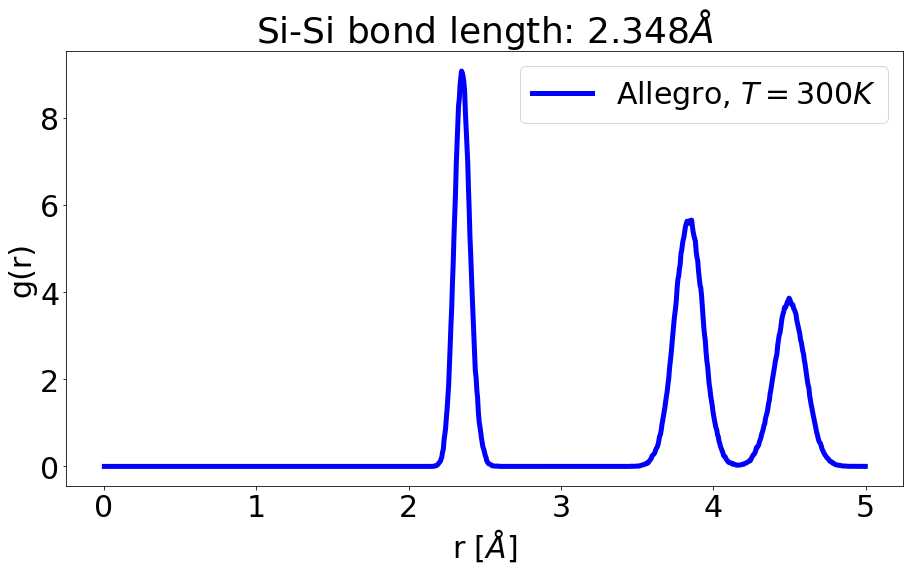

In [ ]:
rdf = parse_lammps_rdf('./lammps_run/si.rdf')  # utility function defined earlier
plt.figure(figsize=(15, 8))
plt.plot(rdf[0][0], rdf[0][1], 'b', linewidth=5, label="Allegro, $T=300K$")
plt.xlabel('r [$\AA$]')
plt.ylabel('g(r)')
plt.title("Si-Si bond length: {:.3f}$\AA$".format(rdf[0][0][np.argmax(rdf[0][1])]))
plt.legend(loc='upper right')
plt.show()

# Extending the NequIP framework

The `nequip` framework, for which Allegro is an extension package, makes it easy to modify or extend models while preserving compatability with all the `nequip-*` tools and LAMMPS pair styles.

To illustrate this, we demonstrate a simple modification to an Allegro model that adds random noise to the predicted pairwise energies before they are summed into per-atom and total energies. To do this, we define two kinds of `nequip` extensions:

 1. A *module*, which includes code we want to put in our model. Modules are just PyTorch `torch.nn.Module`s that include some extra information for `nequip` about the irreps of the data they expect to input and output.
 2. A *model builder*, a function that takes the config (and optionally a model returned by previous model builders) and returns a new version of the model. The model builder is responsible in this case for adding our new module to an existing Allegro model.

In [ ]:
%%writefile noise.py
import torch

from e3nn import o3

from nequip.data import AtomicDataDict
from nequip.nn import GraphModuleMixin, SequentialGraphNetwork, AtomwiseReduce


# First, we define a module that adds noise to a field:
class AddNoiseModule(GraphModuleMixin, torch.nn.Module):
    field: str
    noise_sigma: float
    _dim: int

    def __init__(
        self,
        field: str,
        noise_sigma: float = 0.0,
        irreps_in=None,
    ) -> None:
        super().__init__()
        self.field = field
        self.noise_sigma = noise_sigma
        # We have to tell `GraphModuleMixin` what fields we expect in the input and output
        # and what their irreps will be. Having basic geometry information (positions and edges)
        # in the input is assumed.
        # We will save the unmodified version of `field` in `field + '_noiseless'`
        # we need to tell the framework what irreps this new output field
        # `field + '_noiseless'` will have--- the same as `field`:
        self._init_irreps(irreps_out={field + "_noiseless": irreps_in[field]}, irreps_in=irreps_in)
        # this is just an e3nn.o3.Irreps...
        field_irreps: o3.Irreps = self.irreps_in[field]
        # ...whose properties we can save for later, for example:
        self._dim = field_irreps.dim


    def forward(self, data: AtomicDataDict.Type) -> AtomicDataDict.Type:
        """Run the module.
        The module both takes and returns an `AtomicDataDict.Type` = `Dict[str, torch.Tensor]`.
        Keys that the module does not modify/add are expected to be propagated to the output unchanged.
        """
        noiseless = data[self.field]
        data[self.field + "_noiseless"] = noiseless
        data[self.field] = noiseless + self.noise_sigma * torch.randn(
            (len(noiseless), self._dim),
            dtype=noiseless.dtype, device=noiseless.device
        )
        return data


# Second, we define a model builder to add our new module to an Allegro model:
def AddNoiseToPairEnergies(config, model: SequentialGraphNetwork) -> SequentialGraphNetwork:
    model.insert_from_parameters(
        # see allegro/models/_allegro.py for the names of all modules in an Allegro model
        # `"edge_eng"` is the final readout MLP
        after="edge_eng",
        # name for our new module
        name="add_noise",
        # hardcoded parameters from the builder
        params=dict(
            field="edge_energy"
        ),
        # config from which to pull other parameters--- this means we can set
        # `noise_sigma` in our YAML config file!
        shared_params=config,
        # the module to add:
        builder=AddNoiseModule,
    )
    return model

Writing noise.py


To use this extension, we specify `AddNoiseToPairEnergies` as a model builder after the `Allegro` model builder in our YAML config file:

In [ ]:
# make a new config file with `noise.AddNoiseBuilder` added to `model_builders` after `allegro.model.Allegro`
!perl -p -e 'print " - noise.AddNoiseToPairEnergies\n" if $. == 12' allegro/configs/tutorial.yaml > allegro/configs/tutorial-extension.yaml
# we can set options for our custom class using the YAML config:
!perl -pi -e 'print "noise_sigma: 0.01\n\n" if $. == 9' allegro/configs/tutorial-extension.yaml
# change the run name
!sed -i -e "s/run_name: si/run_name: si-noisy/" allegro/configs/tutorial-extension.yaml
# only train for 1 epoch since this is just an example
!sed -i -e "s/max_epochs: 100/max_epochs: 1/" allegro/configs/tutorial-extension.yaml
# print out the start of the updated YAML
!head -n 18 allegro/configs/tutorial-extension.yaml

# general
root: results/silicon-tutorial
run_name: si-noisy
seed: 123456
dataset_seed: 123456
append: true
default_dtype: float32

noise_sigma: 0.01

# -- network --
model_builders:
 - allegro.model.Allegro
 - noise.AddNoiseToPairEnergies
 # the typical model builders from `nequip` can still be used:
 - PerSpeciesRescale
 - ForceOutput
 - RescaleEnergyEtc


We can now train our extended model just like a default Allegro or NequIP model:

(We modify `PYTHONPATH` here so that the code in `noise.py` is importable; in real-world use you should create an importable Python package for your extension the standard way using `setup.py`, just like `allegro` does.)

In [ ]:
!rm -rf results/silicon-tutorial/si-noisy
!PYTHONPATH=`pwd`:$PYTHONPATH nequip-train allegro/configs/tutorial-extension.yaml

wandb: Currently logged in as: anony-moose-404286. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.13.3
wandb: Run data is saved locally in /content/wandb/run-20220922_045358-thurles1
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run si-noisy
wandb: ⭐️ View project at https://wandb.ai/anony-moose-404286/allegro-tutorial?apiKey=3fdd1fcd9adf0ead3b8cf8d911319dcf43b512c9
wandb: 🚀 View run at https://wandb.ai/anony-moose-404286/allegro-tutorial/runs/thurles1?apiKey=3fdd1fcd9adf0ead3b8cf8d911319dcf43b512c9
wandb: WARNING Do NOT share these links with anyone. They can be used to claim your runs.
Torch device: cuda
Successfully loaded the data set of type ASEDataset(110)...
Replace string dataset_forces_rms to 0.9016265869140625
Replace string dataset_per_atom_total_energy_mean to -129.9612274169922
Atomic outputs are scaled by: [Si: 0.901627], shifted by [Si: -129.961227].
Replace string dataset_forces_rms to 0.9016265869140625
Initially 

We can also compile and deploy it to a model that we could use in LAMMPS with `pair_allegro`:

In [ ]:
!PYTHONPATH=`pwd`:$PYTHONPATH nequip-deploy build --train-dir results/silicon-tutorial/si-noisy si-noisy-deployed.pth
!ls *pth

INFO:root:Loading best_model from training session...
INFO:root:Compiled & optimized model.
si-deployed.pth  si-noisy-deployed.pth


# Next Steps

This concludes our tutorial. A next step would be to head over to https://github.com/mir-group/nequip-allegro, install Allegro, and get started with your own system. If you have questions, please don't hesitate to reach out to `batzner[at]g[dot]harvard[dot]edu` and `albym[at]seas[dot]harvard[dot]edu`, we're happy to help! You can also ask questions on our [GitHub Discussions](https://github.com/mir-group/allegro/discussions).

